## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [13]:
# Import modules
import pandas as pd
import numpy as np

%matplotlib inline
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate as interp
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [14]:
# How many distinct colors are available?
num_colors=len(colors['name'].unique())
print(num_colors)

177


<p> There are 177 different colors in the entire Lego collection. Which ones are the most popular? Let's dig into the inventory data to find out! </p>

In [15]:
# load the inventory database
inventory = pd.read_csv('datasets/inventory_parts.csv')

# count the number of colors
color_inventory=inventory.groupby('color_id')['quantity'].sum().to_frame()
# match the color_id with the name database in colors dataframe
colors_merged=pd.merge(colors,color_inventory,left_on='id',right_on='color_id')

#compute the total sum of colors
total_bricks = colors_merged['quantity'].sum()
colors_merged['percent'] = colors_merged['quantity']/total_bricks*100
colors_merged= colors_merged.sort_values('quantity',ascending=False).reset_index()
colors_merged.index +=1
colors_merged['cumulative_percent']=colors_merged['percent'].cumsum()
#print(colors_merged.index)
colors_merged[['name','quantity','percent','rgb','cumulative_percent']].head(20)

,name,quantity,percent,rgb,cumulative_percent
1,Black,456885,19.757010,05131D,19.757010
2,White,261955,11.327681,FFFFFF,31.084691
3,Light Bluish Gray,253017,10.941176,A0A5A9,42.025867
4,Red,197665,8.547598,C91A09,50.573465
5,Dark Bluish Gray,185496,8.021376,6C6E68,58.594841
6,Yellow,140104,6.058496,F2CD37,64.653337
7,Blue,137886,5.962584,0055BF,70.615921
8,Light Gray,93873,4.059336,9BA19D,74.675257
9,Tan,71269,3.081875,E4CD9E,77.757132
10,Reddish Brown,60796,2.628992,582A12,80.386124


<p>From the data, there's not a lot of variety in the color of Legos. The top 10 colors account for 80% of all the Lego bricks while the top 20 account for 90% of all bricks. Let's graph this using a pie chart.</p>

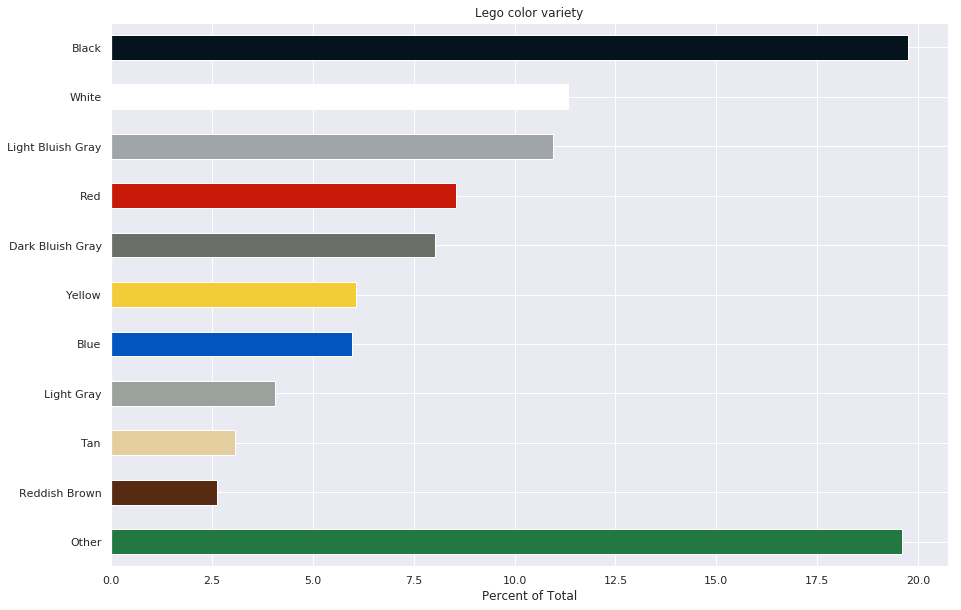

In [16]:
#first let's make a label for 'other' colors so we don't have 177 different data points.

top10 = colors_merged.loc[1:10,'name']
color_hex = ['#237841','#582A12','#E4CD9E','#9BA19D','#0055BF','#F2CD37','#6C6E68','#C91A09','#A0A5A9','#FFFFFF','#05131D']
cutoff_percent = colors_merged.loc[10,'cumulative_percent']
colors_merged['label']=colors_merged.apply(lambda x: x['name'] if x['cumulative_percent'] <= cutoff_percent else 'Other',axis=1)
colors_merged_summary= colors_merged.groupby('label')['percent'].sum().to_frame().loc[['Black','White','Light Bluish Gray','Red', 'Dark Bluish Gray', 'Yellow', 'Blue','Light Gray', 'Tan','Reddish Brown','Other']]


#lets plot 
%matplotlib inline
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

colors_merged_summary[::-1].plot(kind='barh',y='percent',color=color_hex, legend=None,figsize=(15,10))
plt.xlabel('Percent of Total')
plt.ylabel('')
plt.title('Lego color variety')
plt.show()


<p>Black is the most common Lego color, accounting for almost 20% of all Lego bricks, followed by white(11%), and light bluish gray(10%). </p>

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [17]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby(by='is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,149,149,149
t,28,28,28


In [18]:
print("{:2.1f}% of all the colors Lego offers are transparent.".format(28/(149+28)*100))


15.8% of all the colors Lego offers are transparent.


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

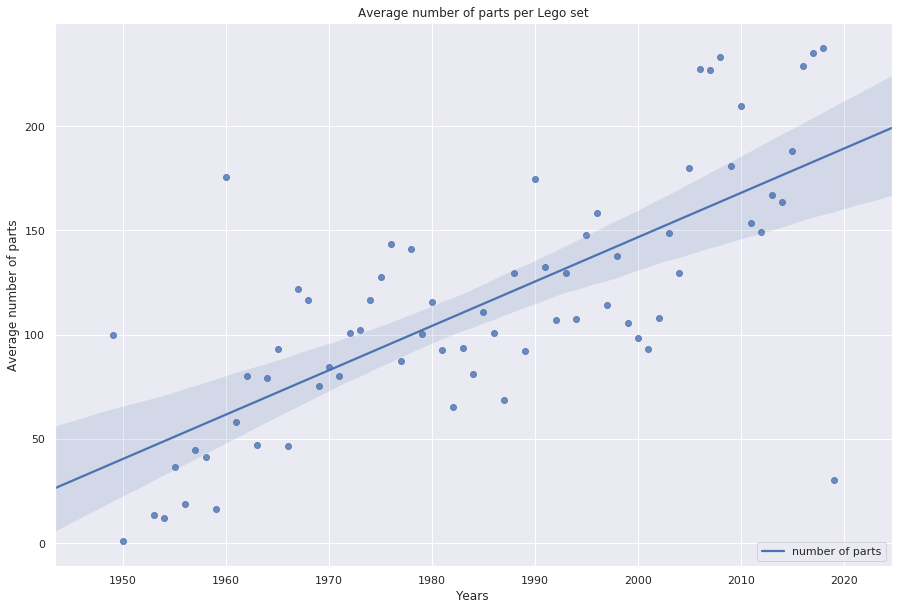

In [19]:
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year',as_index=False)[['num_parts']].mean()
x_parts = np.array(parts_by_year['year'])
x_smooth = np.linspace(x_parts.min(),x_parts.max(),300)
y_parts = np.array(parts_by_year['num_parts'])
f = interp.interp1d(x_parts,y_parts,kind='zero')
# Plot trends in average number of parts by year

g=sns.regplot('year','num_parts',data=parts_by_year,order=1)
g.figure.set_size_inches(15, 10)
plt.xlabel('Years')
plt.ylabel('Average number of parts')
plt.title('Average number of parts per Lego set')
plt.legend(['number of parts'],loc='lower right')
plt.show()

<p> The average number of parts per set has gone up linearly over the years. The average Lego set today has almost 300 parts! That's over 10 times the amount compared to 1950. </p>

Hmm... It looks like our last data point is an outlier. It only shows an average of less than 50 when recent Lego sets average more than 200. Why is that? Lets investigate it further.

In [20]:
parts_by_year.tail()

,year,num_parts
64,2015,188.196699
65,2016,228.683358
66,2017,234.840112
67,2018,237.498571
68,2019,30.456954


<p>The data shows an entry for 2019 which explains why the average might be so low because 2019 is not here yet and we might not have enough data points. Let's see how many sets 2018 had vs 2019. </p>

In [21]:
#Let's see how many 
print('2019 had {:} sets'.format(sets[sets['year']==2019].name.count()))
print('2018 had {:} sets'.format(sets[sets['year']==2018].name.count()))

2019 had 151 sets
2018 had 700 sets


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

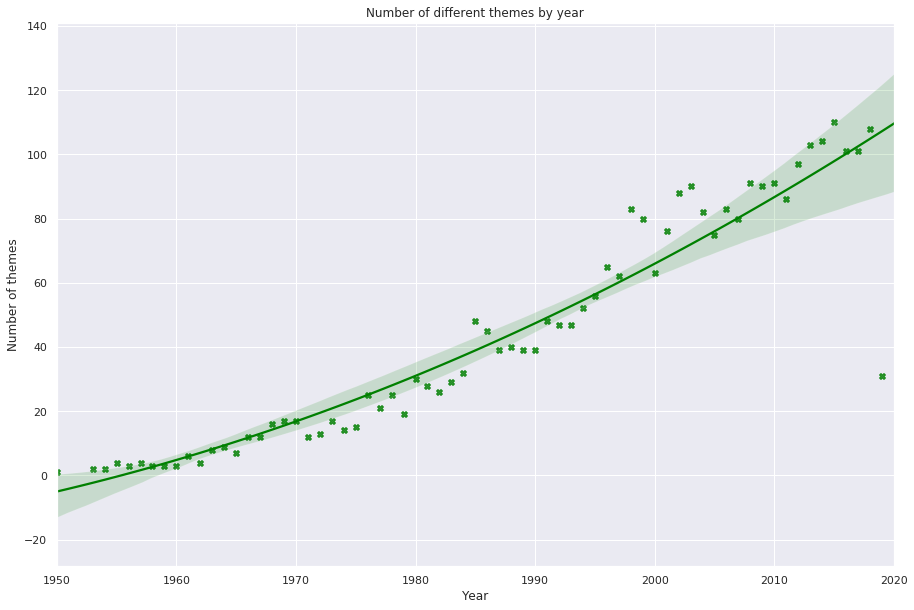

In [22]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')['theme_id'].nunique().to_frame().reset_index()

#themes_by_year.plot(x='year',y='theme_id',linestyle='-',marker='.',color='green', alpha=0.6)
g=sns.regplot(x='year',y='theme_id',data=themes_by_year,order=2,color='green',marker='X')
g.figure.set_size_inches(15, 10)
plt.xlabel('Year')
plt.ylabel('Number of themes')
plt.title('Number of different themes by year')
plt.xlim(1950,2020)
#plt.legend(['themes'],loc='upper left')
plt.show()

<p> The number of themes Lego offers has grown exponentially over the years. </p> 

## 7. Biggest Sets
<p> What are the largest sets in the Lego collection? Let's find out! </p>

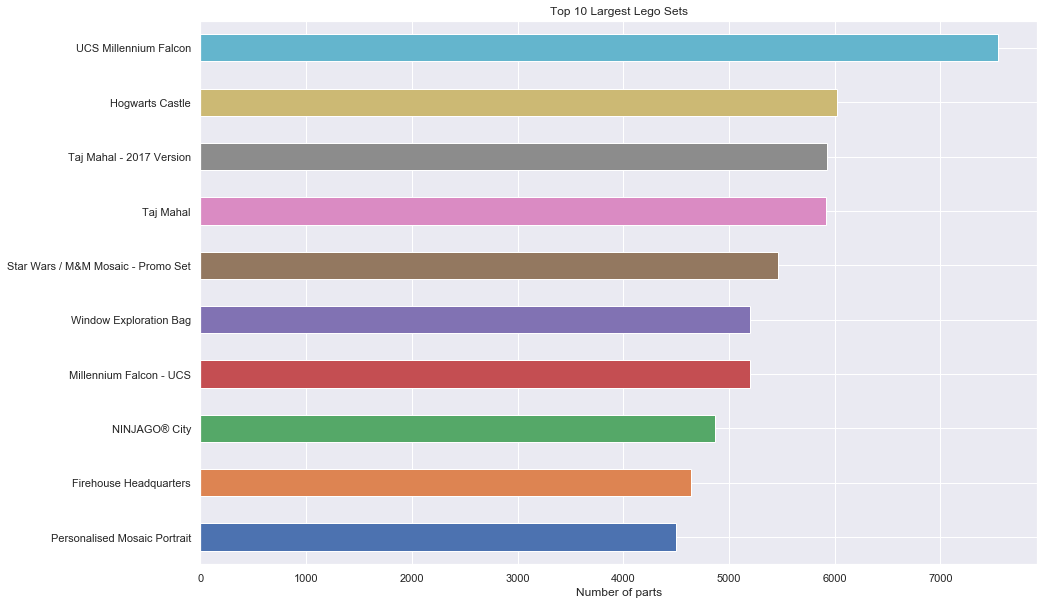

In [25]:
%matplotlib inline

#sort by num_parts
biggest_sets = sets.sort_values(by='num_parts',ascending=True).tail(10)
biggest_sets.plot(kind='barh',x='name',y='num_parts',legend=None, alpha=1, align='center',figsize=(15,10))
plt.ylabel('')
plt.xlabel('Number of parts')
plt.title('Top 10 Largest Lego Sets')
plt.show()

<p>It looks like the UCS Millennium Falcon is the biggest set in the Lego collection with close to 8000 pieces. I'm sure that'll take a long time to assemble! </p>

## 8. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>